<img src="img/usmlogo.png" style="float:right;height:100px">
<img src="img/dilogo.png" style="float:left;height:100px">
<center>
<h1>Laboratorio 1 Estadística Computacional</h1>
<div>
<h4> Giorgio Pellizzari - 2014735 - Malla Nueva</h4>
<h4> Felipe Vega - 201473511-1 - Malla Nueva</h4>
<h5>9 de abril del 2018</h5>
</div>
</center>

# Tiroteos en USA

Para trabajar con el dataset entregado, lo primero es eliminar las columnas con datos que no utilizarán en el estudio. Por esta razón se eliminan las columnas **localidad**, **area**, **raza**, **sexo**, **latitud**, **longitud**, **trabajada**, **trabaja.donde** y **resumen**. Además, se transforma la columna fecha para que sus datos sean de tipo _**DateTime**_ y no de tipo _**String**_.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('usashooting.csv', encoding='latin-1')
dataset.drop('localidad',1, inplace=True)
dataset.drop('area',1, inplace=True)
dataset.drop('raza',1, inplace=True)
dataset.drop('sexo',1, inplace=True)
dataset.drop('latitud',1, inplace=True)
dataset.drop('longitud',1, inplace=True)
dataset.drop('trabajaba',1, inplace=True)
dataset.drop('trabaja.donde',1, inplace=True)
dataset.drop('resumen',1, inplace=True)
dataset['fecha'] = pd.to_datetime(dataset['fecha'])

Dado que se necesita sacar los promedios de _**tiroteos, muertos y heridos**_ desde el año _1983_ se obtiene un subset de datos, donde se tienen dichas columnas para todos los tiroteos desde ese año. Finalmente se puede calcular el promedio de tiroteos por año sumando todos los tiroteos del subset y dividiendolo por la cantidad de años que considera dicho dataset. En el caso los muertos y heridos durante ese período de tiempo, se suman todos los muertos/heridos y se dividen por la cantidad de años analizados.

In [23]:
subDataDesde1983 = dataset[['fecha', 'muertos', 'heridos']].query('fecha.dt.year >= 1983')
cantidadDeAños = len(subDataDesde1983.groupby(subDataDesde1983['fecha'].dt.year))
promedioTiroteos = len(subDataDesde1983)/cantidadDeAños
promedioMuertos = subDataDesde1983['muertos'].sum()/cantidadDeAños
promedioHeridos = subDataDesde1983['heridos'].sum()/cantidadDeAños
print("Promedio de tiroteos por año, entre 1983 y 2017: "+str(promedioTiroteos))
print("Promedio de muertos en tiroteos por año, entre 1983 y 2017: " + str(promedioMuertos))
print("Promedio de heridos en tiroteos por año, entre 1983 y 2017: " + str(promedioHeridos))


Promedio de tiroteos por año, entre 1983 y 2017: 8.885714285714286
Promedio de muertos en tiroteos por año, entre 1983 y 2017: 39.22857142857143
Promedio de heridos en tiroteos por año, entre 1983 y 2017: 54.48571428571429


Se observa que el promedio de tiroteos por año, considerando los datos entre 1983 y 2017, es de aproximadamente 9 tiroteos. El promedio de heridos por año es mayor al promedio de muertos por año, con aproximadamente 54 y 39 afectados respectivamente.

Como se necesita analizar la cantidad de muertos y heridos dependiendo del estado mental del perpetuador, se genera un subset con dichas columnas, dejando de lado los tiroteos donde no se tiene registro del estado mental. Para comparar, se utilizan boxplot, donde se grafican las cajas para la cantidad de heridos y para la cantidad de muertos para los tiroteos donde el perpetuador tiene problemas mentales y cuando no los tiene.

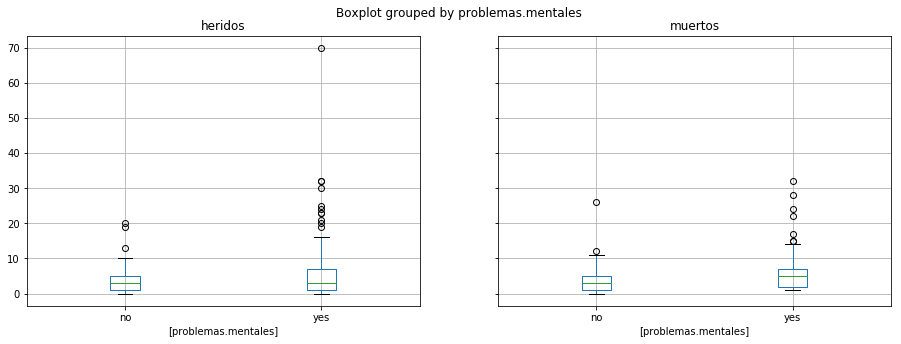

In [51]:
subDataMental = dataset[['muertos', 'heridos','problemas.mentales']]
subDataMental.loc[:,'problemas.mentales'] = subDataMental.loc[:,'problemas.mentales'].str.lower()
subDataMental.loc[:,'problemas.mentales'].fillna("unknown",inplace=True)
subDataMental = subDataMental[subDataMental['problemas.mentales'] != 'unclear']
subDataMental = subDataMental[subDataMental['problemas.mentales'] != 'unknown']


color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians = 'DarkBlue', caps='Gray')

plt.figure()
subDataMental.boxplot(by='problemas.mentales', figsize=(15, 5))
plt.show()



Se puede observar que en los casos donde se presentan atacantes con problemas mentales hay una mayor presencia de _**outliers**_ en los heridos y los muertos sobre el bigote superior. Esto indica que cuando se tienen atacantes con problemas mentales se dan más casos extremadamente violentos, donde la cantidad de víctimas es grande.

Dado que no se aprecia las relaciones entre las cajas de los boxplot, se grafican nuevos boxplot pero sin colocar los _**outliers**_ (pero considerandolos igualmente para el cálculo de los cuartiles).

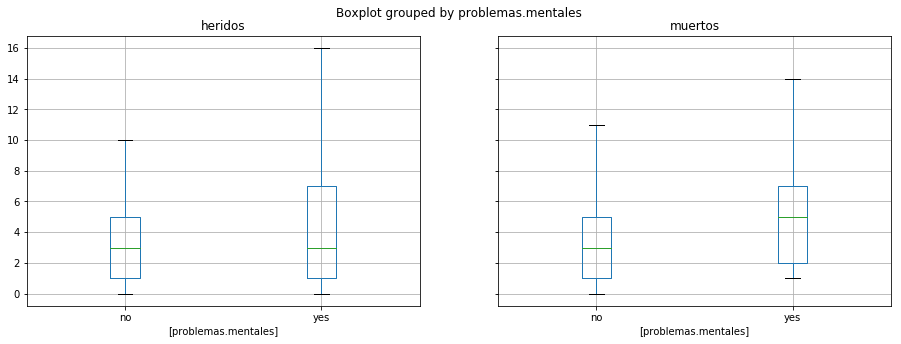

In [26]:
plt.figure()
subDataMental.boxplot(by='problemas.mentales', figsize=(15, 5), showfliers=False)
plt.show()

**ACÁ DEBERÍA COLOCAR MÁS ANÁLISIS**

Por otro lado, se desea analizar los tiroteos ocurridos en los períodos de ejercicio de dos presidentes de los Estados Unidos, George W. Bush (20/01/2001 - 20/01/2009) y Barack Obama (20/01/2009 - 20/01/2017). Por esta razón de generan dos subset de datos, con los tiroteos ocurridos en dichos períodos respectivamente. 

El día 20/01/2009 se contabilizará como parte del gobierno de Bush. Además, no se considerarán las columnas _**localidad, area, raza, sexo, latitud, longitud, trabajaba, trabajaba.donde y resumen**_ para realizar los subset. También se pasan los campos _**motivo y problemas.mentales**_ a minúsculas.

El subset con los tiroteos ocurridos durante el período de ejercicio de George W. Bush está almacenado en la variable _**periodoBush**_ y el subset con los tiroteos producidos en el período de Barack Obama se encuentran en la variable _**periodoObama**_.

In [13]:
periodoBush = dataset.query("fecha >= '20-01-2001' and fecha <= '20-01-2009'")
periodoObama = dataset.query("fecha > '20-01-2009' and fecha <= '20-01-2017'")

periodoBush.loc[:,'problemas.mentales'] = periodoBush.loc[:,'problemas.mentales'].str.lower()
periodoBush.loc[:,'motivo'] = periodoBush.loc[:,'motivo'].str.lower()
periodoObama.loc[:,'problemas.mentales'] = periodoObama.loc[:,'problemas.mentales'].str.lower()
periodoObama.loc[:,'motivo'] = periodoObama.loc[:,'motivo'].str.lower()


Se obtienen el número de víctimas de cada período sumando los valores de la columna _**victimas.totales**_ para cada período. 

In [21]:
print("Las victimas totales del período de Bush es: "+ str(periodoBush['victimas.totales'].sum())+ " en un total de "+ str(len(periodoBush))+" tiroteos.")
print("Las victimas totales del período de Obama es: " + str(periodoObama['victimas.totales'].sum())+ " en un total de " + str(len(periodoObama))+ " tiroteos")

Las victimas totales del período de Bush es: 336 en un total de 35 tiroteos.
Las victimas totales del período de Obama es: 1475 en un total de 198 tiroteos


Se obtiene que las víctimas durante el período de Bush alcanzaron un total de 336 afectados en un total de 35 tiroteos. El el período de Obama se alcanzó un total de 1475 víctimas en 198 tiroteos. 

Para ver cual fue la mayor causa de los ataques de cada período se generan dos gráficos de barras (1 por período), graficando la frecuencia con la que aparece cada motivo del subset de datos.

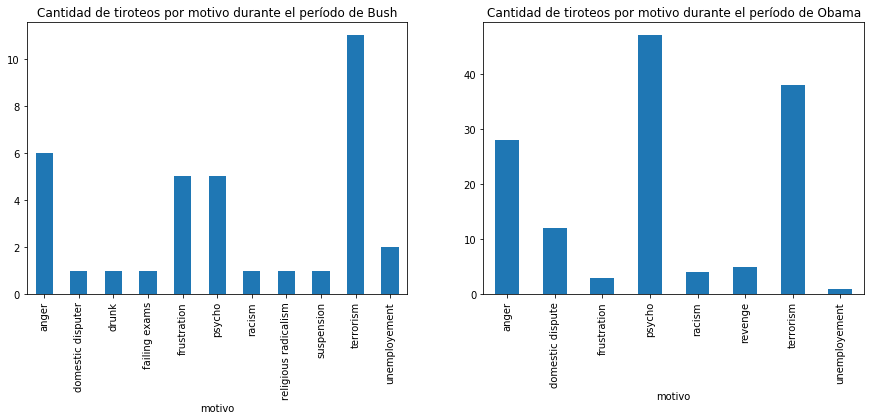

In [61]:
porMotivoBush = periodoBush.groupby(['motivo'])
porMotivoObama = periodoObama.groupby(['motivo'])

#plt.figure()
#porMotivoBush.size().plot(kind='bar', title="Cantidad de tiroteos por motivo durante el período de Bush")
#plt.show()
#plt.figure()
#porMotivoObama.size().plot(kind='bar', title="Cantidad de tiroteos por motivo durante el período de Obama")
#plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2)
porMotivoBush.size().plot(kind='bar', title="Cantidad de tiroteos por motivo durante el período de Bush", ax=axes[0],figsize=(15, 5))
porMotivoObama.size().plot(kind='bar', title="Cantidad de tiroteos por motivo durante el período de Obama", ax=axes[1],figsize=(15, 5))
plt.show()